# Introduction to Machine Learning
# Part I: Regression

__Goal: Predict wine quality score using the given chemical properties.__  

Data: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

## Overview:

Generally, a supervised machine learning workflow will consist of the following elements:
1. Data Cleaning and Exploration
2. Data Preparation
3. Model Selection
4. Train and Validate Model (training data)
5. Test and Make Predictions (test data)

## 0. Preliminaries
* Import supporting libraries
* We'll reference sklearn as we go

In [18]:
# Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Set default plotting style
import seaborn as sns
sns.set_style('darkgrid')

## 1. Data Cleaning and Exploration

In [19]:
# Import data.
df = pd.read_csv('winequality-red.csv', delimiter=';')

# Preview data frame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


* All numeric values
* Target variable is an integer, all others are continuous
* Different scales spaninng 4 orders of magnitude


In [20]:
# Get basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* No null values
* 12 columns, 1599 rows
* Floats and ints

In [21]:
# Summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


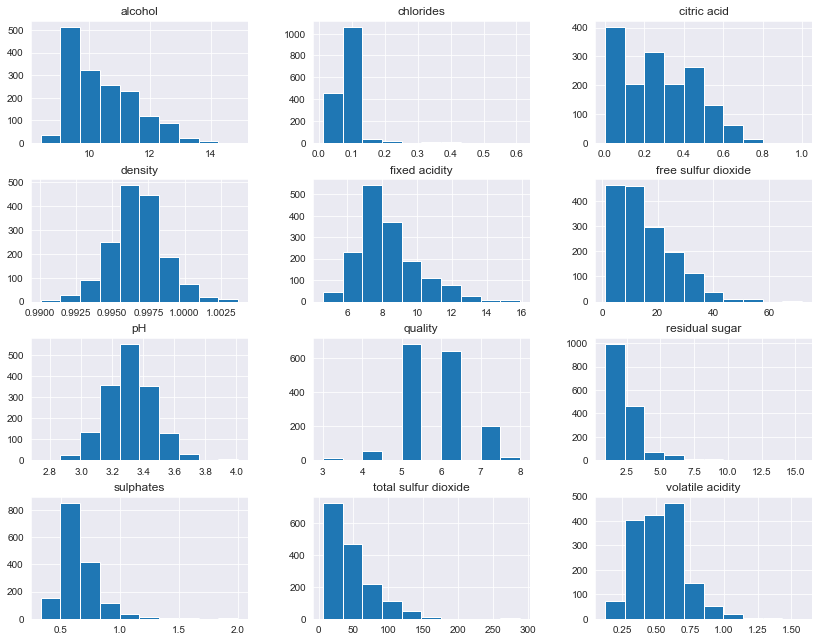

In [22]:
# Histograms
df.hist(figsize=(14,11))
plt.show()

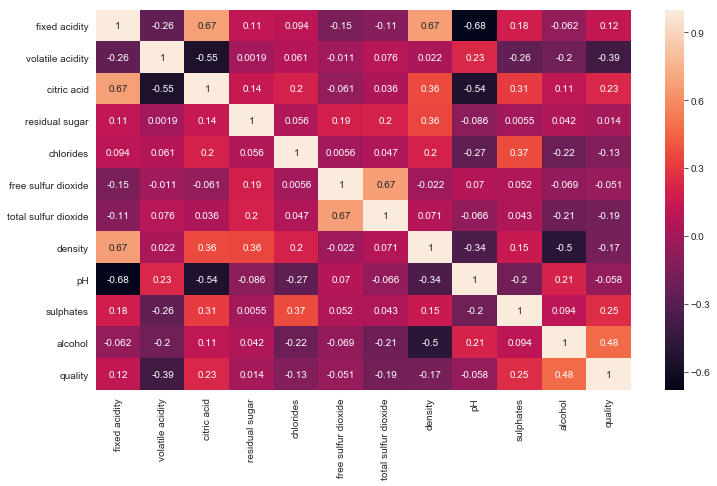

In [23]:
# Calculate pairwise correlations
corr = df.corr()

# Plot as a heatmap
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)
plt.show()

## 2. Data Preparation

* Explicitly specify features and target variable
* Train / Test split
* Scale using standardization

__Specify features and target__

In [24]:
# Specify features 
X = df.drop(['quality'], axis=1)

# Specify target
y = df['quality']

In [25]:
# Features.  The quality column has been removed.
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
# Target.  Only the quality column.
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

__Train/Test Split__

In [27]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

# Split data, reserving 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [28]:
# Training preview
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4
932,7.6,0.400,0.29,1.9,0.078,29.0,66.0,0.99710,3.45,0.59,9.5
510,12.4,0.420,0.49,4.6,0.073,19.0,43.0,0.99780,3.02,0.61,9.5
146,5.8,0.680,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0
928,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2


In [29]:
# Shapes
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (1119, 11)
X_test: (480, 11)


__Standardization__

In [30]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Create instance 
scaler = StandardScaler()

In [31]:
# Use instance to fit and transform train and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Take a look at scaled data
X_train_scaled

array([[-1.43060152, -0.74289587, -0.74222169, ...,  2.07367359,
         0.04205151,  1.83908129],
       [-0.43377603, -0.71511641,  0.07933857, ...,  0.94356723,
        -0.4120439 , -0.8670868 ],
       [ 2.38079006, -0.60399855,  1.10628889, ..., -1.9149371 ,
        -0.29852005, -0.8670868 ],
       ...,
       [ 2.9085212 , -0.54843962,  1.56841653, ..., -1.64902972,
        -0.97966316, -1.3336675 ],
       [ 0.56304946,  0.45162111, -0.07470398, ..., -0.45244652,
        -0.24175812, -0.68045452],
       [-1.02014397,  1.59057916, -1.30704437, ...,  1.80776621,
         1.29081388,  1.74576515]])

## 3. Model Selection

* Random Forest Regression

In [32]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create model instance
rf = RandomForestRegressor()

## 4. Train and Validate Model (training data only)

* Fit with all training data
* K-folds cross validation (k=3)
* Feature importance

__Fit & Validate__

In [33]:
# Import cross validation
from sklearn.model_selection import cross_val_score

# Fit 
rf.fit(X_train_scaled, y_train)

# Validate
cross_val_score(rf, X_train_scaled, y_train, cv=3)

array([0.40745857, 0.28431007, 0.39120552])

* Adjust hyperparameters
* Test additional models
* Pick the best to continue

__Feature Importance__ 

*(Depending on model choice)*

* Relevance of feature within model 

In [176]:
# Create helper function to extract and plot feature importance
def feature_importance(columns, feature_importances):
    features = dict(zip(columns, feature_importances))
    importance = pd.DataFrame.from_dict(features, orient='index').rename(columns={0:'importance'}).sort_values(by='importance')
    importance.plot(kind='barh', figsize=(10,8))

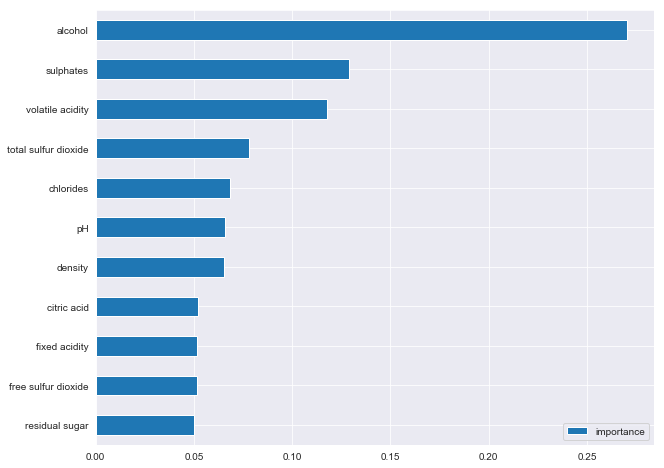

In [177]:
# Get feature importances.  
feature_importance(df.columns, rf.feature_importances_)

## 5. Test and Make Predictions (test data)
* Feed test data into model 
* Generate predictions
* "How does model generalize to unseen data?"

__Test Accuracy__

In [34]:
# Test data
rf.score(X_test_scaled, y_test)

0.388716987447699

* If overfit, test accuracy lower than training accuracy

__Predictions__

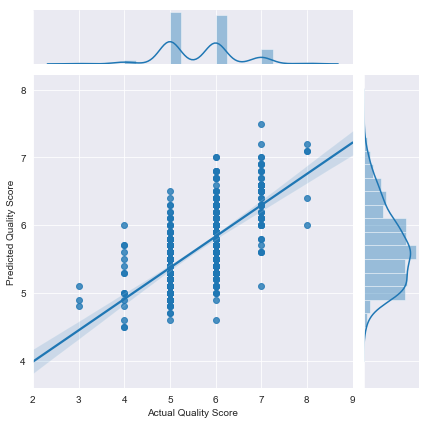

In [203]:
# Make predictions
y_pred = rf.predict(X_test_scaled)

# Plot against actual 
sns.jointplot(y_test, y_pred, kind='reg')
plt.xlabel('Actual Quality Score')
plt.ylabel('Predicted Quality Score')
plt.show()

__Pop Quiz - Why is this not the greatest problem for a regression model after all?__

.










.









.







.










.









.

Answer: The target variable is actually a discrete outcome.  We have 6 classes of potential outcomes (3 through 8), making it more conducive to a multiclass classification problem.  



__Experiment:__

What happens if we round our predictions to the nearest integer?

In [204]:
# Round to whole value
rounded_pred = np.round(y_pred, 0)

# Accuracy score  
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rounded_pred)

0.6229166666666667

* Problem is better suited for a multiclass classification model

## Up Next:

* Binary classification 